<a href="https://colab.research.google.com/github/jblanco89/MonteCarlo_Portfolio/blob/main/get_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycoingecko

In [2]:
import pandas as pd
from datetime import datetime
from pycoingecko import  CoinGeckoAPI

cg = CoinGeckoAPI()

In [3]:
coin_list = cg.get_coins_list()
type(coin_list)

list

In [4]:
coin_list_df = pd.DataFrame(coin_list)
coin_list_df.head()

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token


In [5]:
stock_id = coin_list_df[coin_list_df.symbol.isin(['cake'])]
stock_id.iloc[0,0]

'pancakeswap-token'

In [6]:
def get_id(symbs):
  stock_id = []
  for s in symbs:
    stock_id.append(coin_list_df[coin_list_df.symbol.isin([s])].iloc[0,0])
  return stock_id

def timetoUnix(start_date, end_date):
  date_obj_1 = datetime.strptime(start_date, '%m/%d/%y')
  date_obj_2 = datetime.strptime(end_date, '%m/%d/%y')

  range_1 = (date_obj_1 - datetime(1970,1,1)).total_seconds()
  range_2 = (date_obj_2 - datetime(1970,1,1)).total_seconds()
  return range_1, range_2




In [7]:
symbs = ['btc', 'ltc', 'pvu', 'cake', 'sol', 'ada', 'crv', 'ray', 'AVAX']
id_data = get_id(symbs=symbs)


In [8]:
date_1 = '07/27/21'
date_2 = '09/25/21'

t= timetoUnix(date_1,date_2)


In [9]:
data = []
for id in id_data:
  data.append(cg.get_coin_market_chart_range_by_id(id, 'usd', t[0], t[1]))



In [10]:
len(id_data)

9

In [11]:
pr={}
for i in range(0,len(id_data)):
  pr[i] = sum(data[i]['prices'], [])

  

In [12]:
prices = []
dates = []
for coin in range(0,len(id_data)):
  for price in pr[coin][1::2]:
    prices.append(price)
  
for date in pr[0][::2]:
  date = (int(date)/1000)
  e = (datetime.utcfromtimestamp(date).strftime('%m/%d/%y'))
  dates.append(e)


In [13]:
particion = int((t[1] - t[0]) / 3600)

In [14]:
particion

1440

In [15]:
len(prices)

12827

In [16]:
def slice_per(source, step):
    return [source[i::step] for i in range(step)]

In [17]:
data_pr = slice_per(prices,particion)

In [18]:
pr_df = pd.DataFrame(data_pr, columns=symbs)
pr_df

,btc,ltc,pvu,cake,sol,ada,crv,ray,AVAX
0,37226.653324,43118.742862,149.015249,15.942648,34.543598,1.348697,1.723675,3.388914,13.573288
1,37385.813653,43040.241370,151.203520,15.798125,34.172512,1.349047,1.731141,3.397917,13.599013
2,36986.680690,43185.540089,152.972905,15.760128,33.593977,1.320429,1.740666,3.410482,13.256720
3,36547.977268,130.957131,152.721474,15.881187,34.023489,1.318082,1.727461,3.414522,13.212138
4,36890.358223,130.633148,13.800171,15.826205,34.785342,1.307807,1.689468,3.412654,13.281197
...,...,...,...,...,...,...,...,...,...
1435,41818.629528,148.659096,16.348489,35.072074,1.357796,1.720112,3.449457,13.865358,NaN
1436,42339.870940,146.969852,16.421392,35.319141,1.343468,1.723623,3.468470,13.650973,NaN
1437,42085.973048,148.285465,16.541694,35.535645,1.336191,1.719327,3.454924,13.608602,NaN
1438,42245.517963,148.018189,16.526784,35.733002,1.343222,1.702414,3.431921,13.678442,NaN


In [19]:
pr_df.shape

(1440, 9)

In [20]:
dates_df = pd.DataFrame(dates, columns=['Date'])
dates_df.tail()

,Date
1438,09/24/21
1439,09/24/21
1440,09/24/21
1441,09/24/21
1442,09/24/21


In [21]:
pr_df.shape


(1440, 9)

In [22]:
dates_df.shape

(1443, 1)

In [23]:
pr_df = pr_df.reset_index(drop=True)
dates_df = dates_df.reset_index(drop=True)

In [24]:
df_final = pd.concat([dates_df, pr_df], axis=1)
df_final.tail()

,Date,btc,ltc,pvu,cake,sol,ada,crv,ray,AVAX
1438,09/24/21,42245.517963,148.018189,16.526784,35.733002,1.343222,1.702414,3.431921,13.678442,NaN
1439,09/24/21,42399.216146,149.419391,16.213493,35.130179,1.353722,1.705091,3.435573,13.566011,NaN
1440,09/24/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1441,09/24/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1442,09/24/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
import matplotlib.pyplot as plt


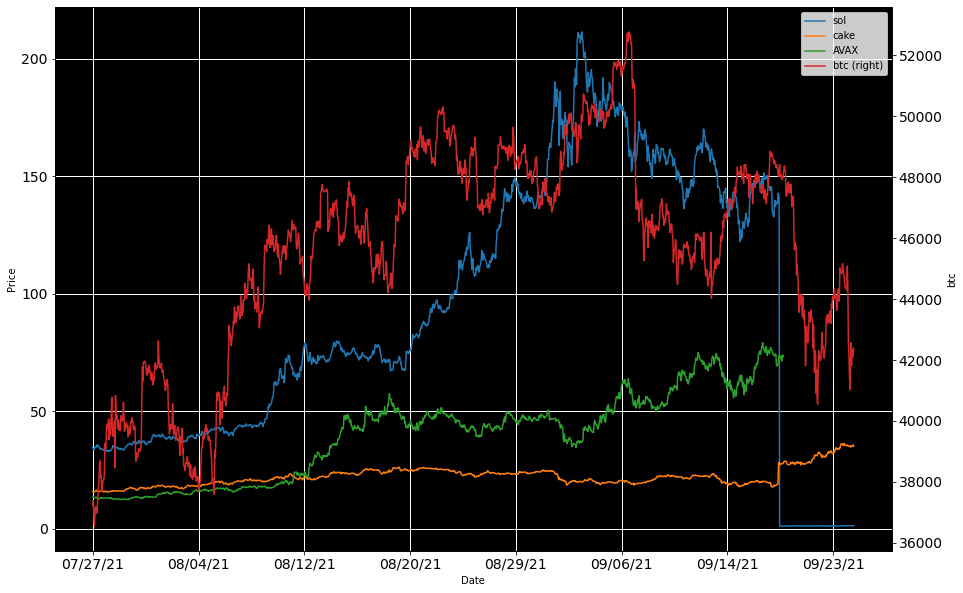

In [26]:
ax = df_final.plot(x='Date', y=['sol', 'cake', 'AVAX'], figsize=(15,10))
ax2 = df_final.plot(x='Date', y='btc',secondary_y=True, ax=ax)
ax.grid(False, color='w', linestyle='-', linewidth=1)
ax.set_facecolor('0')
ax.set_ylabel('Price')
ax2.set_ylabel('btc')
ax.tick_params(labelsize = 14)
ax2.tick_params(labelsize = 14)
plt.show()